In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline


fish = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Fish.csv')

In [191]:
fish.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


In [192]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


<Axes: >

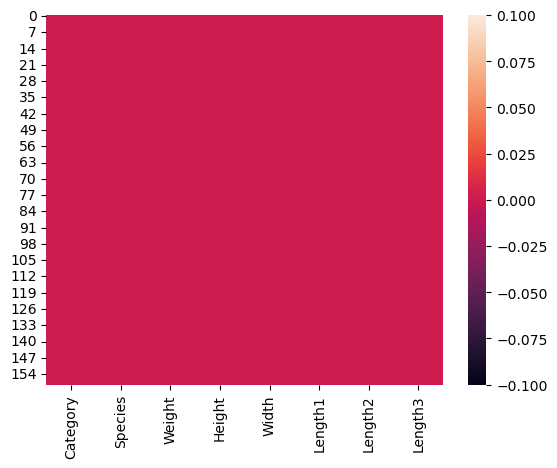

In [193]:
sns.heatmap(fish.isnull())

In [194]:
fish.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


In [195]:
fish1 = fish.drop(columns="Species", axis=1)
fish1.head()

,Category,Weight,Height,Width,Length1,Length2,Length3
0,1,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,430.0,12.4440,5.1340,26.5,29.0,34.0


<Axes: >

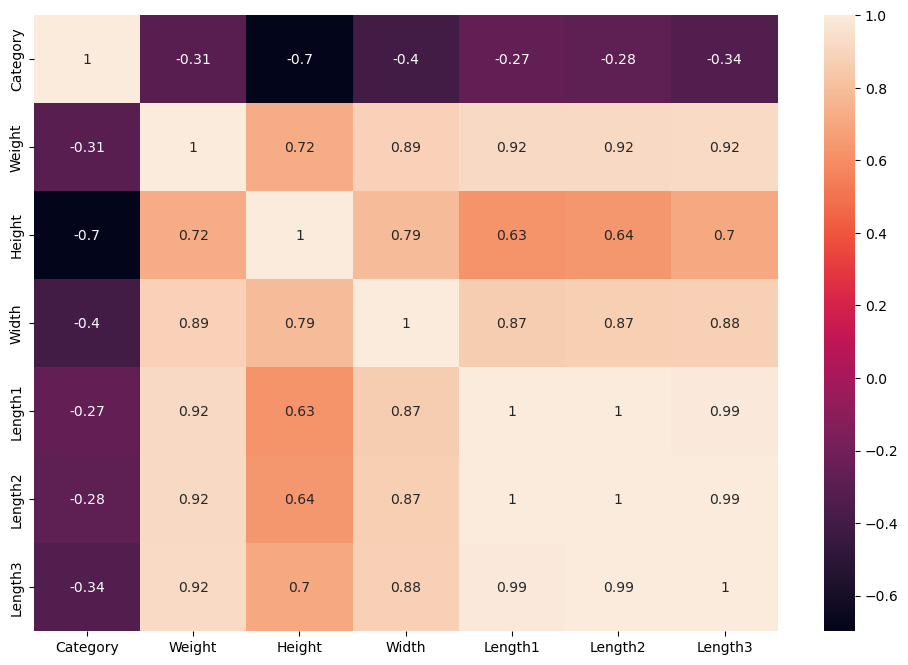

In [196]:
plt.figure(figsize=(12,8))
sns.heatmap(fish1.corr(),annot=True)


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


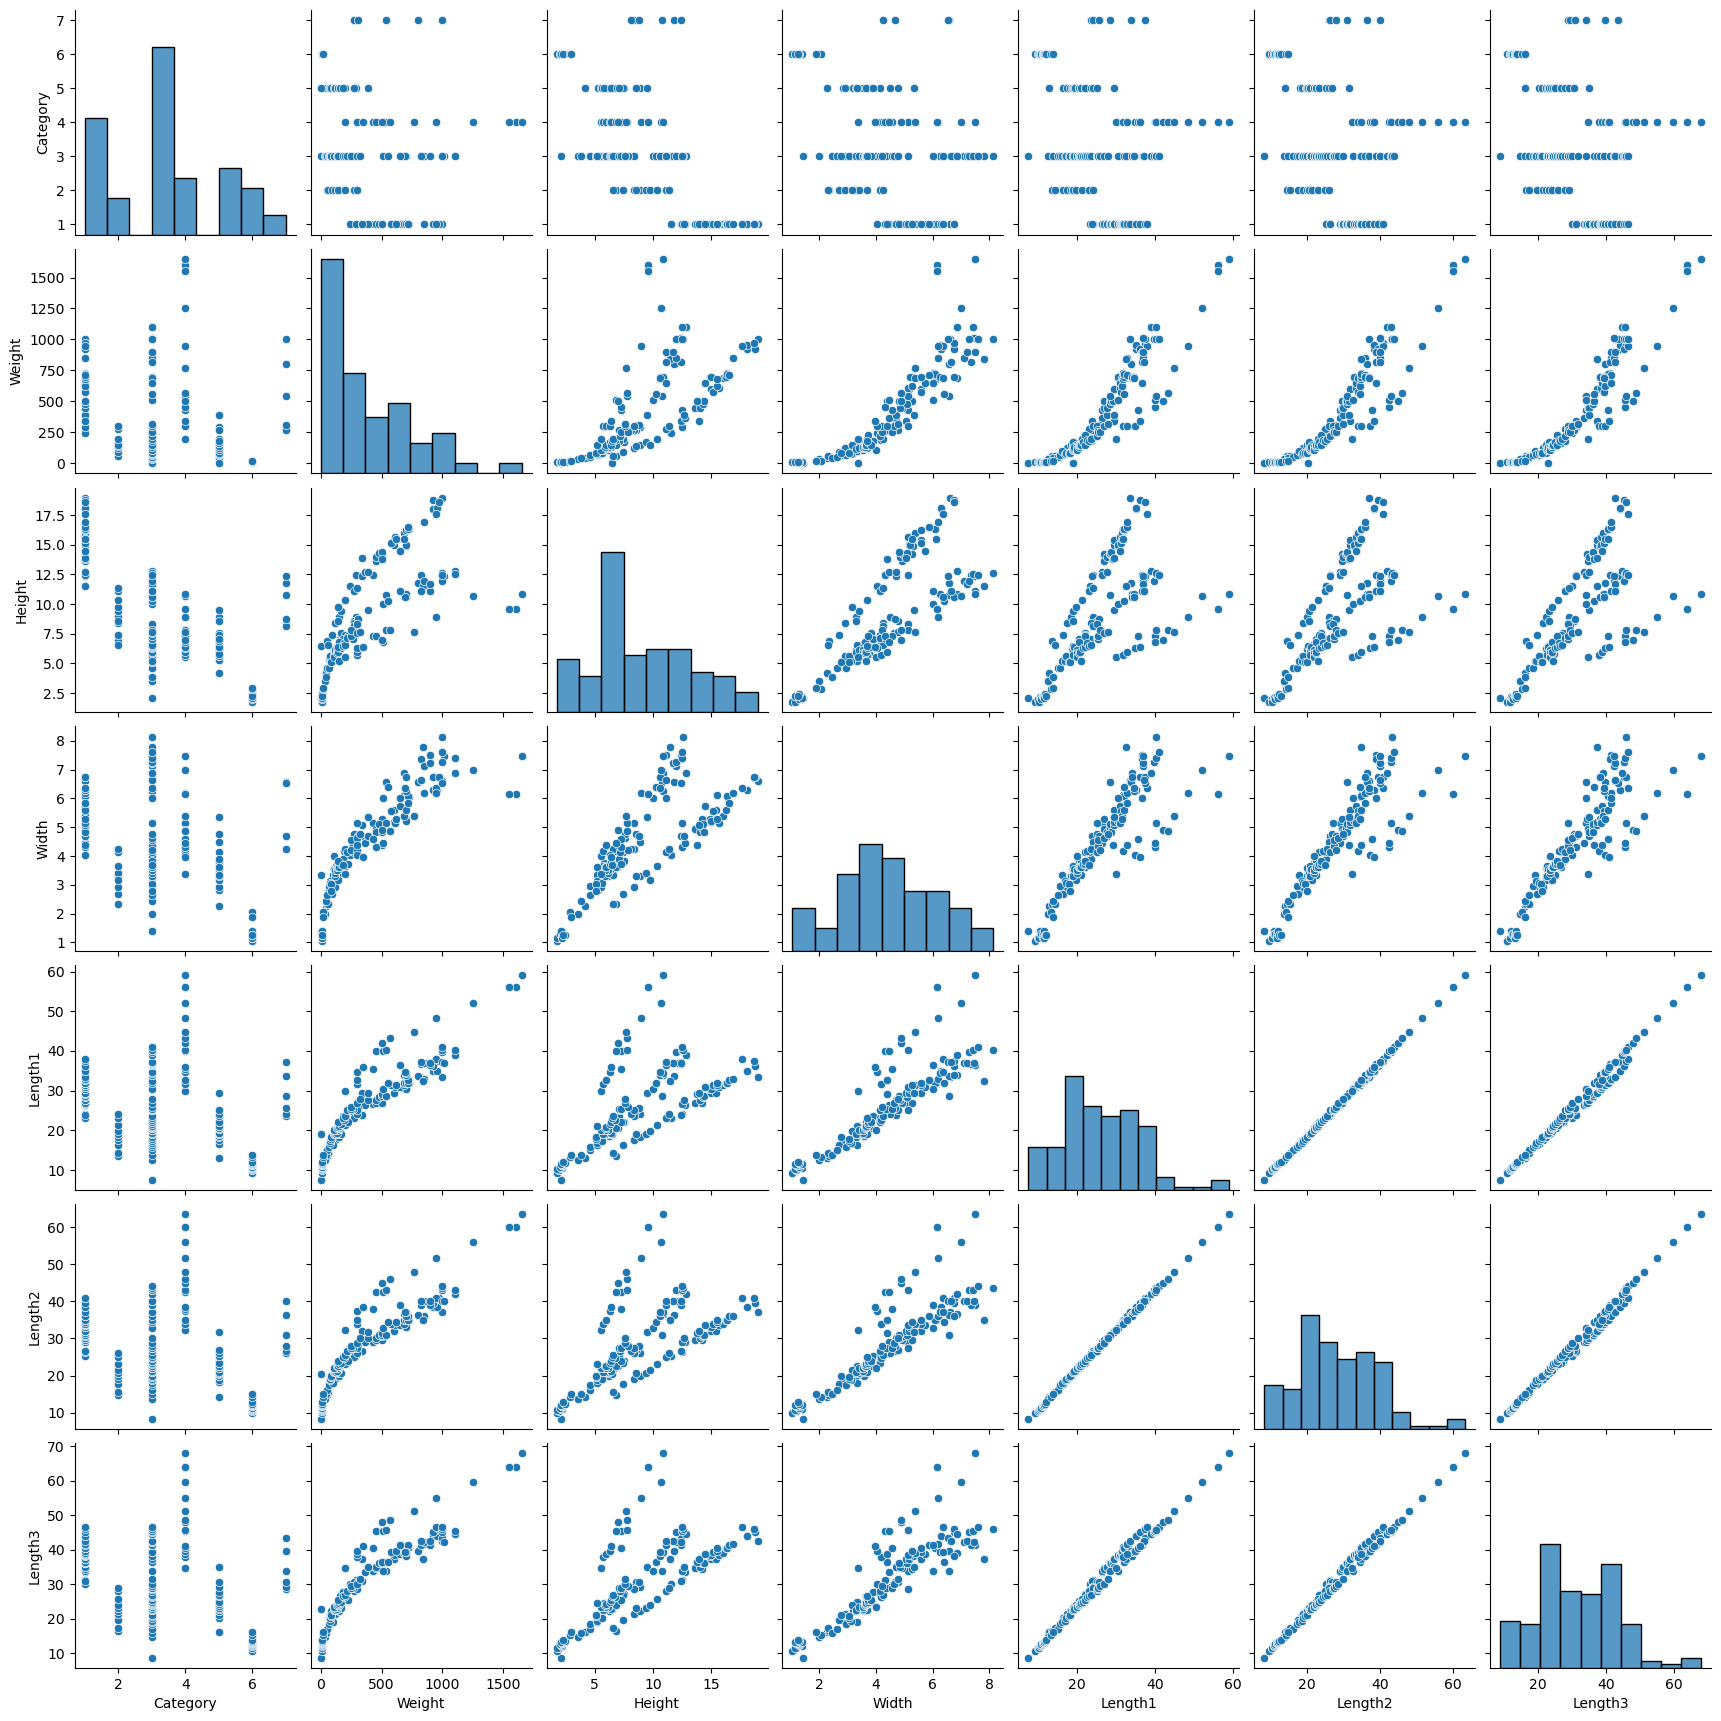

In [197]:
sns.pairplot(fish1)

In [198]:
features = ['Height', 'Width', 'Length1', 'Length2', 'Length3']
x = fish1[features]
y = fish1['Weight']
x.shape, y.shape

((159, 5), (159,))

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=30)
x.shape, x_train.shape, x_test.shape

((159, 5), (111, 5), (48, 5))

In [200]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [201]:
model.coef_

array([ 36.08237041,   2.29826969,  48.12901794,  17.84418049,
       -38.60585909])

In [202]:
pd.DataFrame(model.coef_, x.columns, columns=['Coedicients'])

,Coedicients
Height,36.082370
Width,2.298270
Length1,48.129018
Length2,17.844180
Length3,-38.605859


In [203]:
score = model.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8814767180984276


In [204]:
y_pred = model.predict(x_test)

MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [205]:
MAE , MSE, RMSE

(102.09513473633127, 17581.44103869823, 132.59502644782054)

In [206]:
fish1['Weight'].mean()

398.3264150943396

In [207]:
test_residual= y_test - y_pred

In [208]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


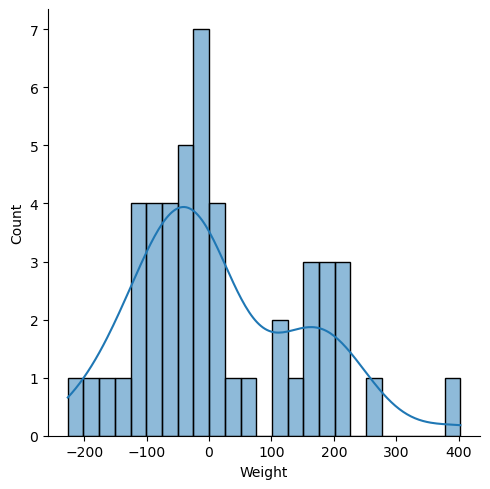

In [209]:
sns.displot(test_residual, bins=25, kde=True)

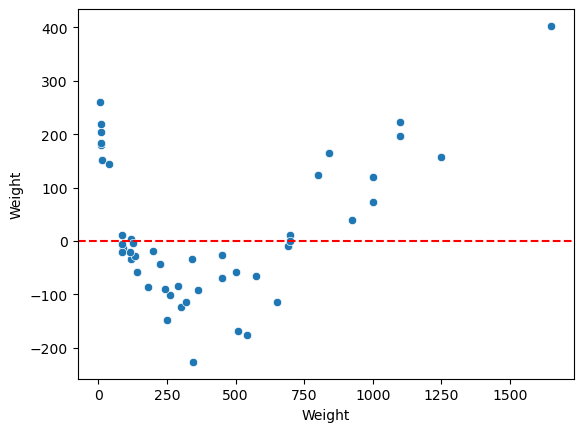

In [210]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')

In [211]:
input_data = np.array([[12.3778,4.6961,23.9,26.5,31.1]])
prediction = model.predict(input_data)
print('Berat Ikan Adalah :', prediction)

Berat Ikan Adalah : [374.3862204]


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [213]:
import pickle

filename = 'prediksi_berat_ikan.sav'
pickle.dump(model,open(filename,'wb'))